#**EDA Of Netflix and Prime Content**

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
df = pd.read_csv("/content/netflix-prime-data.csv")

In [10]:
df.head()

,show_id,platform,type,title,director,country,date_added,release_year,rating,duration,listed_in,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
0,n1,Netflix,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,25-Sep-21,2020,PG-13,90 min,Documentaries,NaN,NaN,NaN,NaN
1,n2,Netflix,TV Show,Blood & Water,NaN,South Africa,24-Sep-21,2021,TV-MA,2 Seasons,International TV Shows,NaN,NaN,NaN,NaN
2,n3,Netflix,TV Show,Ganglands,Julien Leclercq,NaN,24-Sep-21,2021,TV-MA,1 Season,Crime TV Shows,NaN,NaN,NaN,NaN
3,n4,Netflix,TV Show,Jailbirds New Orleans,NaN,NaN,24-Sep-21,2021,TV-MA,1 Season,Docuseries,NaN,NaN,NaN,NaN
4,n5,Netflix,TV Show,Kota Factory,NaN,India,24-Sep-21,2021,TV-MA,2 Seasons,International TV Shows,NaN,NaN,NaN,NaN


In [11]:
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
df.head()

,show_id,platform,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,n1,Netflix,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,25-Sep-21,2020,PG-13,90 min,Documentaries
1,n2,Netflix,TV Show,Blood & Water,NaN,South Africa,24-Sep-21,2021,TV-MA,2 Seasons,International TV Shows
2,n3,Netflix,TV Show,Ganglands,Julien Leclercq,NaN,24-Sep-21,2021,TV-MA,1 Season,Crime TV Shows
3,n4,Netflix,TV Show,Jailbirds New Orleans,NaN,NaN,24-Sep-21,2021,TV-MA,1 Season,Docuseries
4,n5,Netflix,TV Show,Kota Factory,NaN,India,24-Sep-21,2021,TV-MA,2 Seasons,International TV Shows


In [12]:
df.describe()

,release_year
count,18475.000000
mean,2011.124980
std,15.262484
min,1920.000000
25%,2011.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [13]:
df.shape

(18475, 11)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18475 entries, 0 to 18474
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       18475 non-null  object
 1   platform      18475 non-null  object
 2   type          18475 non-null  object
 3   title         18475 non-null  object
 4   director      13758 non-null  object
 5   country       8648 non-null   object
 6   date_added    8952 non-null   object
 7   release_year  18475 non-null  int64 
 8   rating        18134 non-null  object
 9   duration      18472 non-null  object
 10  listed_in     18475 non-null  object
dtypes: int64(1), object(10)
memory usage: 1.6+ MB


In [15]:
df.nunique()

,0
show_id,18475
platform,2
type,2
title,18083
director,9675
country,782
date_added,1785
release_year,100
rating,29
duration,244


In [20]:
df.isna().sum()

,0
show_id,0
platform,0
type,0
title,0
director,0
country,0
date_added,0
release_year,0
rating,0
duration,0


In [17]:
df['director'] = df['director'].fillna('Unknown')
df['country'] = df['country'].fillna('Unknown')
df = df.dropna(subset=['duration'])
df['rating'] = df['rating'].fillna('Unknown')

In [19]:
df['release_year_date'] = pd.to_datetime(df['release_year'].astype(str), format='%Y', errors='coerce')
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df['date_added'] = df['date_added'].fillna(df['release_year_date'])

/tmp/ipython-input-1682343644.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')


In [ ]:
df['type'].value_counts()

,count
type,
Movie,5653
TV Show,2316


In [ ]:
df['country'].value_counts().head(10)


,count
country,
United States,2479
India,940
Unknown,676
United Kingdom,350
Japan,239
South Korea,196
Canada,162
Spain,127
France,106


In [21]:
df['rating'].value_counts()

,count
rating,
TV-MA,3284
TV-14,2368
13+,2117
R,1809
16+,1547
ALL,1268
18+,1243
TV-PG,1032
PG-13,883


In [28]:
# Merge redundant rating categories
# Mapping dictionary
rating_map = {
    'UR': 'Unrated',
    'UNRATED': 'Unrated',
    'NR': 'Unrated',
    'NOT_RATE': 'Unrated',
    'TV-NR': 'Unrated',
    'Unknown': 'Unrated',

    '16+': '16+',
    '16': '16+',
    'AGES_16_': '16+',

    '18+': '18+',
    'AGES_18_': '18+',

    'ALL': 'All Ages',
    'ALL_AGES': 'All Ages',

    'TV-Y7-FV': 'TV-Y7'
}

df['rating'] = df['rating'].replace(rating_map)


In [29]:
rating_merge_map = {
    'TV-G': 'G',
    'PG': 'PG',
    'TV-PG': 'PG',
    '7+': 'TV-Y7',
    'TV-Y7': 'TV-Y7',
    'TV-Y': 'All Ages',
}

df['rating'] = df['rating'].replace(rating_merge_map)
df['rating'].value_counts()

,count
rating,
TV-MA,3284
TV-14,2368
13+,2117
R,1809
All Ages,1650
PG,1572
16+,1550
18+,1246
PG-13,883


###Time-based Trends

In [30]:
df['release_year'].value_counts().sort_index()

,count
release_year,
1920,3
1922,2
1923,1
1924,1
1925,9
...,...
2017,1593
2018,1770
2019,1959


In [31]:
#Content added to platform over time
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce', infer_datetime_format=True)
df['year_added'] = df['date_added'].dt.year
contentAdded = df['year_added'].value_counts().sort_index()

/tmp/ipython-input-4054904079.py:2: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce', infer_datetime_format=True)


In [32]:
print(contentAdded)

year_added
1920       3
1922       2
1923       1
1924       1
1925       8
        ... 
2017    1739
2018    2259
2019    2933
2020    2829
2021    3042
Name: count, Length: 100, dtype: int64


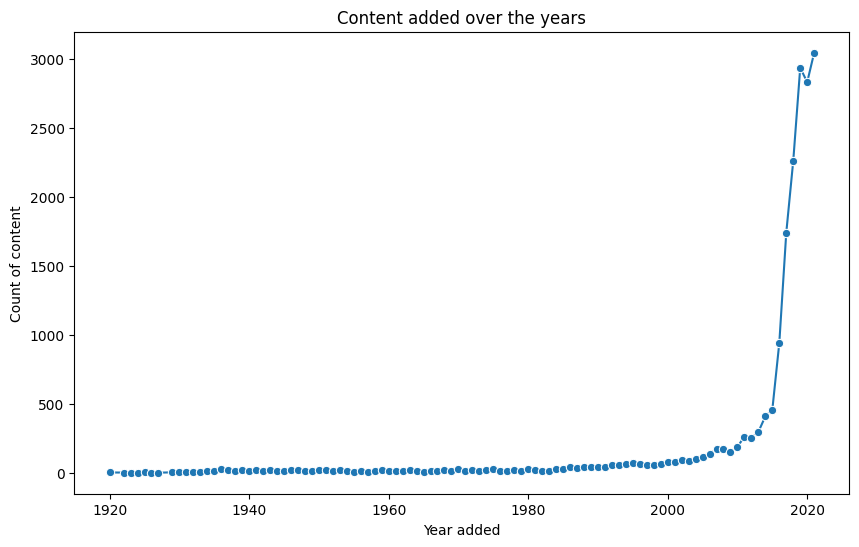

In [34]:
df['year_added'] = df['date_added'].dt.year
content_per_year = df['year_added'].value_counts().sort_index()
plt.figure(figsize=(10,6))
sns.lineplot(x=content_per_year.index, y=content_per_year.values, marker="o")
plt.title("Content added over the years")
plt.xlabel("Year added")
plt.ylabel("Count of content")
plt.show()

###Duration Analysis

In [35]:
#Average duration of movies
df_movies = df[df['type']=='Movie']
df_movies['duration'].str.replace(' min','').astype(int).mean()

np.float64(94.9447711949505)

In [36]:
#Average duration of shows
df_shows = df[df['type']=='TV Show']
df_shows['duration'].str.replace(' Season','').str.replace('s','').astype(int).mean()

np.float64(1.7479028697571743)

In [37]:
df_movies = df[df['type'] == 'Movie'].copy()
df_movies['duration_min'] = df_movies['duration'].str.replace(' min','').astype(int)
avg_duration = df_movies.groupby('release_year')['duration_min'].mean()

##Average Movie Duration by Year

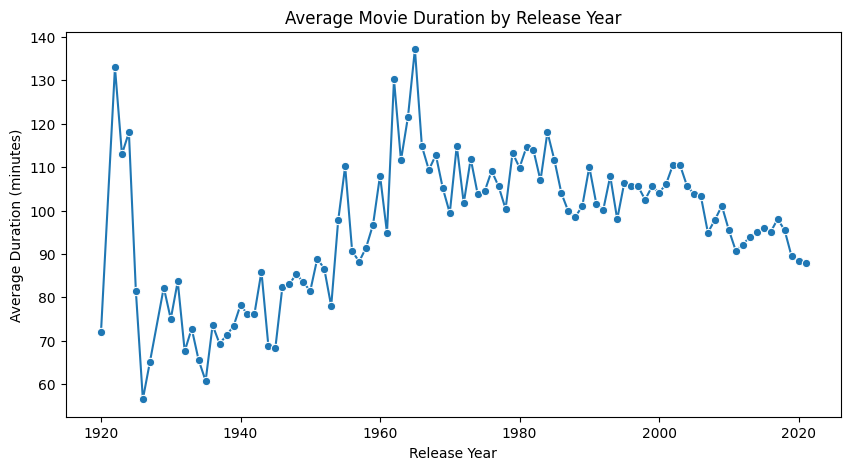

In [38]:
plt.figure(figsize=(10,5))
sns.lineplot(x=avg_duration.index, y=avg_duration.values, marker='o')
plt.title("Average Movie Duration by Release Year")
plt.xlabel("Release Year")
plt.ylabel("Average Duration (minutes)")
plt.show()

###Distribution of TV Show Seasons

In [39]:
df_shows = df[df['type'] == 'TV Show'].copy()
df_shows['seasons'] = df_shows['duration'].str.replace(' Season','').str.replace('s','').astype(int)

/tmp/ipython-input-700403387.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='seasons', data=df_shows, palette='viridis')


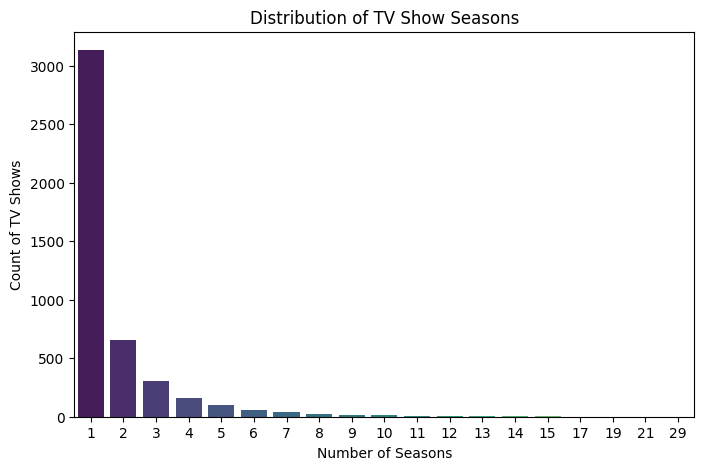

In [40]:
plt.figure(figsize=(8,5))
sns.countplot(x='seasons', data=df_shows, palette='viridis')
plt.title("Distribution of TV Show Seasons")
plt.xlabel("Number of Seasons")
plt.ylabel("Count of TV Shows")
plt.show()

###Number of Movies vs TV Shows

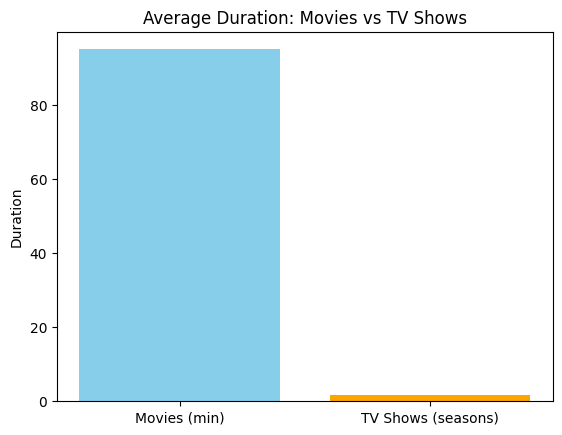

In [41]:
avg_movie_duration = df_movies['duration_min'].mean()
avg_seasons = df_shows['seasons'].mean()
plt.bar(['Movies (min)', 'TV Shows (seasons)'], [avg_movie_duration, avg_seasons], color=['skyblue','orange'])
plt.title("Average Duration: Movies vs TV Shows")
plt.ylabel("Duration")
plt.show()

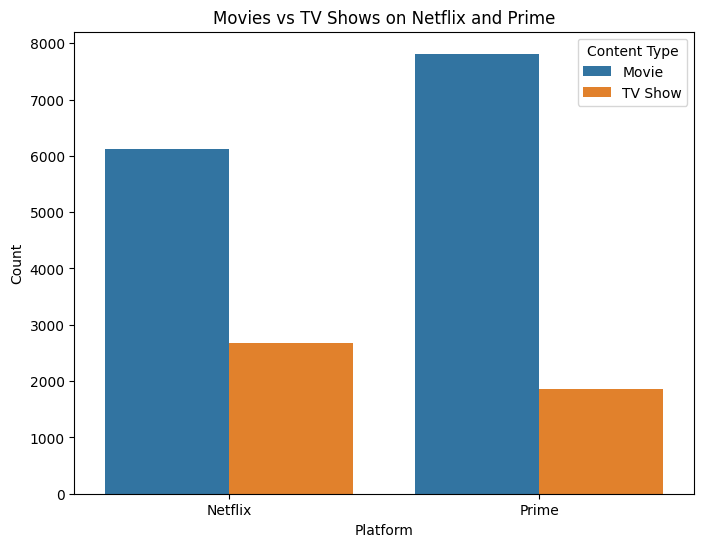

In [42]:
content_type = df.groupby(['platform', 'type']).size().reset_index(name='count')
plt.figure(figsize=(8,6))
sns.barplot(data=content_type, x='platform', y='count', hue='type')
plt.title("Movies vs TV Shows on Netflix and Prime")
plt.xlabel("Platform")
plt.ylabel("Count")
plt.legend(title="Content Type")
plt.show()

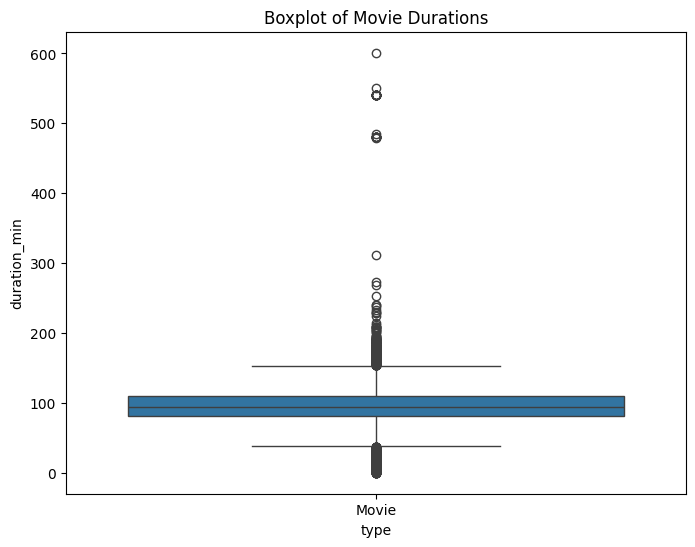

In [43]:
plt.figure(figsize=(8,6))
sns.boxplot(x='type', y='duration_min', data=df_movies[['type','duration_min']])
plt.title("Boxplot of Movie Durations")
plt.show()

In [44]:
df['listed_in'].value_counts()

,count
listed_in,
Drama,2216
Action,1657
Dramas,1600
Comedy,1475
Comedies,1210
...,...
Romantic Movies,3
Spanish-Language TV Shows,2
LGBTQ Movies,1


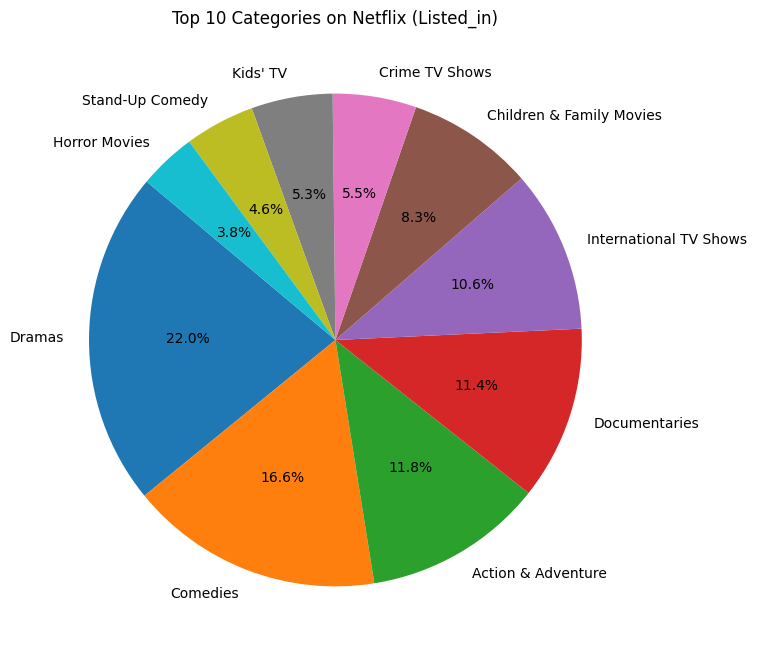

In [45]:
netflix_df = df[df['platform'] == 'Netflix']
listed_exploded = netflix_df['listed_in'].str.split(', ').explode()
category_counts = listed_exploded.value_counts().head(10)  # top 10 for clarity

plt.figure(figsize=(8,8))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Top 10 Categories on Netflix (Listed_in)")
plt.show()


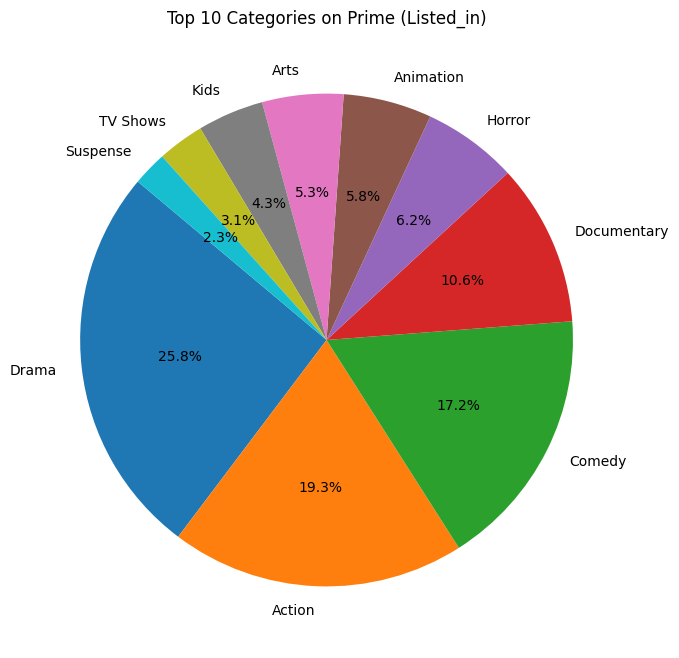

In [46]:
prime_df = df[df['platform'] == 'Prime']
listed_exploded = prime_df['listed_in'].str.split(', ').explode()
category_counts = listed_exploded.value_counts().head(10)  # top 10 for clarity

plt.figure(figsize=(8,8))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Top 10 Categories on Prime (Listed_in)")
plt.show()
